# Lab 3A: Implement Simple Linear Regression 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
dataset = pd.read_csv("Salary.csv")         #PSW

In [3]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
dataset.shape

(30, 2)

In [5]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


### Preprocessing steps

In [7]:
# Step 1: Divide dataframe into i/p independent variable and output dependent features
X= dataset.iloc[:,:-1]
Y= dataset.iloc[:,-1]

In [8]:
print(X.head())

   YearsExperience
0              1.1
1              1.3
2              1.5
3              2.0
4              2.2


In [9]:
print(Y.head())

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64


In [10]:
# Step 4: Spliting Data into Training and Testing
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [11]:
print(X_train.shape)
print(X_test.shape)

(24, 1)
(6, 1)


## Create Regression model on training data

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [13]:
print("Intercept: ", regressor.intercept_)
print("Coefficient: ", regressor.coef_)

Intercept:  26197.76702738423
Coefficient:  [9418.56697369]


From above values our model regression line equation

**y=b0+b1*X**

**y=26197.767027384238 + 9418.56697369*X**

by using above equation lwets find salary for experience=6

In [14]:
ynew=26197.767027384238 + 9418.56697369*6
print("Salary for 6 yr exp: ",ynew)

Salary for 6 yr exp:  82709.16886952423


In [15]:
ypred =regressor.predict(X_test)

In [16]:
print(ypred)
print(Y_test)

[ 72348.74519846  53511.61125108 100604.44611953 115674.15327744
  81767.31217215  68581.31840899]
15     67938.0
5      56642.0
22    101302.0
26    116969.0
18     81363.0
14     61111.0
Name: Salary, dtype: float64


#### Accuracy Of Model

In [17]:
# 1. training accuracy

print("Training Accuracy: ",regressor.score(X_train,Y_train))

Training Accuracy:  0.954524919039405


In [18]:
# 2. testing accuracy

print("Testing Accuracy: ",regressor.score(X_test,Y_test))

Testing Accuracy:  0.9695039421049821


## Visualizing the model

#### Visualize the training data

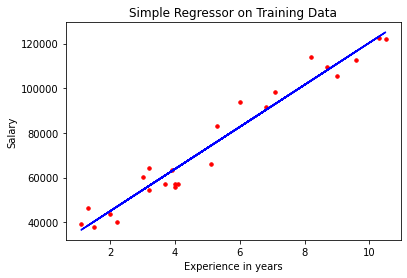

In [19]:
plt.scatter(X_train, Y_train, color = "red" ,s=12)
plt.plot(X_train, regressor.predict(X_train), color = "blue")
plt.title("Simple Regressor on Training Data")
plt.xlabel("Experience in years")
plt.ylabel("Salary")
plt.show()

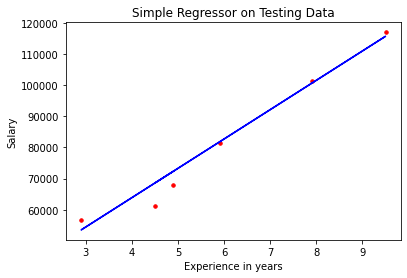

In [20]:
plt.scatter(X_test, Y_test, color = "red" ,s=12)
plt.plot(X_test, regressor.predict(X_test), color = "blue")
plt.title("Simple Regressor on Testing Data")
plt.xlabel("Experience in years")
plt.ylabel("Salary")
plt.show()

**Find R^2 Score of model**

In [21]:
from sklearn.metrics import r2_score
r2_score(Y_test,ypred)

0.9695039421049821

**Test Your Knowledge**

**Q]Predict Salary for 6.1 Year Experience**

In [29]:
pred = regressor.predict([[6.1]])
pred

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([83651.02556689])

In [31]:
predi=26197.767027384238 + 9418.56697369*6.1
predi

83651.02556689324

**Q] Change the random state**

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=57)

# Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [33]:
# model on testing data
ypred = regressor.predict(X_test)
ypred

array([82225.47392205, 45871.84304206, 65446.87505436, 63582.58629129,
       57057.57562052, 69175.45258052])

In [34]:
# Accuracy, R^2
print("Training accuracy: ",regressor.score(X_train,Y_train) )
print("Testing accuracy: ",regressor.score(X_test,Y_test) )
print("R^2 score: ",r2_score(Y_test,ypred) )

Training accuracy:  0.9576054599427444
Testing accuracy:  0.809635146935763
R^2 score:  0.809635146935763


In [35]:
# Predict Salary for 6.1 Year Experience
regressor.predict([[6.1]])

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([84089.76268513])